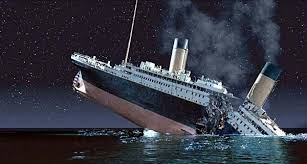
# Titanic Data Analysis #

## Introduction ##

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. Source: [Kaggle Titanic Competition](https://www.kaggle.com/c/titanic)

This project will complete the analysis of Titanic Data to explore the factors that made people more likely to survive.

## Questions ##
What factors made people more likely to survive?
+ Did chance of survival depend on Sex?
+ Did one's ticket class realted to the chance of survival?
+ Did Age influence one's chance of survival?

## Data Wrangling ##
### Data Description ###
Firstly, let's look at the data. (Data source:[Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data))

**Data Dictionary**

|Variable	|Definition|Key|
|:--------- |:---------|:--|
|survival	|Survival  |0 = No, 1 = Yes|
|pclass	    |Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	    |Sex	   | |
|Age	    |Age in years| |
|sibsp	    |# of siblings / spouses aboard the Titanic| |
|parch	    |# of parents / children aboard the Titanic| |
|ticket	    |Ticket number|	 |
|fare	    |Passenger fare| |	
|cabin	    |Cabin number|	|
|embarked   |Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**Variable Notes**

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data, r for raw string to avoid unicode error
titanic_data_raw = pd.read_csv(r"C:\Files\Udacity\Data Analyst Nanodegree\Part 3\Project-Titanic Data Analysis\titanic-data.csv")

In [2]:
# Print the first few records
titanic_data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the data info we can see there are 891 passagers' info intotal in our titanic data, and some attributes with unavailable data:
+ Age, only 714 records among 891 passangers
+ Cabin, even less records with 204 only among 891 passangers
+ Embarded, 2 records are missing and 889 records are available

So for further analysis the attribute "Cabin" will be excluded completely. And rows with unavailable "Age" data will also be excluded. And the 2 missing data in attribute "Embarked" will be fill in with "X" for unavailable cells so that these 2 rows will not be ignored when analyzing other attributes.

In [4]:
#Check if there is duplicated entries
data_duplicated = titanic_data_raw.duplicated()
print 'There is/are {} duplicated entry/entires.'.format(data_duplicated.sum())

There is/are 0 duplicated entry/entires.


From duplicated check we find there is no duplicated entries, so next step is to exclude the unavailable column "Cabin". Our question is what factors made people more likely to survive, and some attributes which with unique data will not be considered as the factors we want, such as "PassengerId", "Name", "Ticket" and "Fare".

In [5]:
#Exclude unwanted colunmns
titanic_data = titanic_data_raw.drop(['PassengerId', 'Name','Ticket','Fare','Cabin','Embarked'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
# Exclude passengers with missing ages
titanic_data_clean = titanic_data.dropna(subset = ['Age'])
titanic_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
# check again the cleaned data info
titanic_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB


In [8]:
titanic_data_clean.describe()

,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373
std,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


The data now can be explored.

## Data Exploration ##
### Passangers Information Summary ###

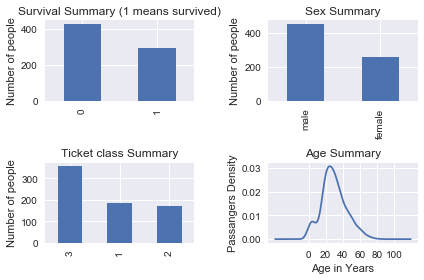

In [9]:
%matplotlib inline
plt.subplot2grid((2,2),(0,0))
titanic_data_clean['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Summary (1 means survived)')
plt.ylabel('Number of people')

plt.subplot2grid((2,2),(0,1))
titanic_data_clean['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Summary')
plt.ylabel('Number of people')

plt.subplot2grid((2,2),(1,0))
titanic_data_clean['Pclass'].value_counts().plot(kind='bar')
plt.title('Ticket class Summary')
plt.ylabel('Number of people')

plt.subplot2grid((2,2),(1,1))
titanic_data_clean['Age'].plot(kind='kde',xticks=[0,20,40,60,80,100],)
plt.title('Age Summary')
plt.xlabel('Age in Years')
plt.ylabel('Passangers Density')

plt.tight_layout()

In [10]:
#titanic_data_clean['Sex'].value_counts()['male']
def rate_calculator_oned (attribute, value):
    total_number = float(titanic_data_clean[attribute].size)
    specific_number = float(titanic_data_clean[attribute].value_counts()[value])
    
    return round((specific_number/total_number),2)


**Total Passangers Survival Summary:**

In [11]:
titanic_data_clean['Survived'].value_counts()  #print to see number of survived and not survived people

print "Total survival rate: {}".format(rate_calculator_oned ('Survived', 1))

Total survival rate: 0.41


**Passangers Sex Distribution Summary**

In [12]:
titanic_data_clean['Sex'].value_counts()      #print to see number of female and male passanger

print "Female passangers rate: {}".format(rate_calculator_oned ('Sex', 'female'))
print "Male passangers rate: {}".format(rate_calculator_oned ('Sex', 'male'))

Female passangers rate: 0.37
Male passangers rate: 0.63


**Passangers Ticket Class Distribution Summary**

In [13]:
titanic_data_clean['Pclass'].value_counts()      #print to see number of every class passangers

print "Class 1 passangers rate: {}".format(rate_calculator_oned ('Pclass', 1))
print "Class 2 passangers rate: {}".format(rate_calculator_oned ('Pclass', 2))
print "Class 3 passangers rate: {}".format(rate_calculator_oned ('Pclass', 3))

Class 1 passangers rate: 0.26
Class 2 passangers rate: 0.24
Class 3 passangers rate: 0.5


The above Passangers Information Summary shows that less then half of the passangers were survived and the survival rate is 0.41. 

Female passangers were less than male passangers, with a rate of 0.37 while male passangers had a rate of 0.63, let's see if the survival rate for female passangers is less or more than male passangers later.

Half of the passangers had a class 3 ticket, and the rest class 1 and class 2 passangers had almost the same rate.


### Attribute 1: Sex###
Now let's see what's the relationship between sex and the survival rate. (Question 1)

In [22]:
#survival rates for female and male passangers
Survived_male = titanic_data_clean.groupby('Sex').mean()['Survived']
print Survived_male

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


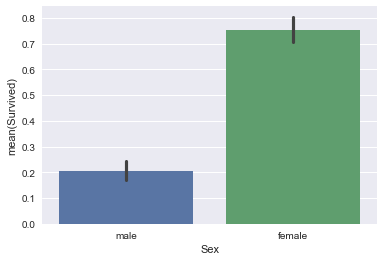

In [23]:
#plot bar chart
sns.barplot(x='Sex',y='Survived',data=titanic_data_clean)

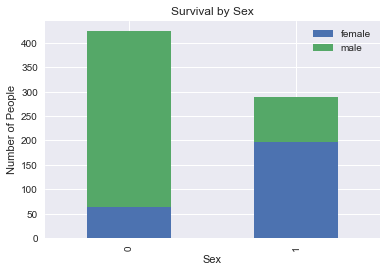

In [17]:
fig = plt.figure()

survived_male = titanic_data_clean.Survived[titanic_data_clean.Sex == 'male'].value_counts()
survived_female = titanic_data_clean.Survived[titanic_data_clean.Sex == 'female'].value_counts()
df=pd.DataFrame({'male':survived_male, 'female':survived_female})

df.plot(kind='bar', stacked=True)
plt.title('Survival by Sex')
plt.xlabel('Sex') 
plt.ylabel('Number of People')
plt.show()

Now we see among three ticket class if the distribution looks same with above.

In [18]:
def survived_sex_by_class(x):   #see survived sex distribution in different ticket class
    fig = plt.figure()

    class_x = titanic_data_clean[titanic_data_clean.Pclass == x]

    class_x_survived_male = class_x.Survived[class_x.Sex == 'male'].value_counts()
    class_x_survived_female = class_x.Survived[class_x.Sex == 'female'].value_counts()
    df=pd.DataFrame({'male':class_x_survived_male, 'female':class_x_survived_female})
    
    return df

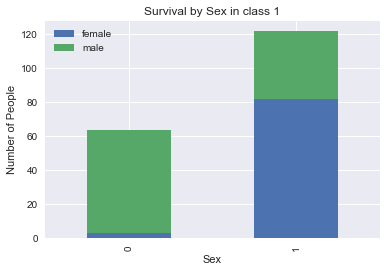

In [19]:
fig = plt.figure()

survived_sex_by_class_one = survived_sex_by_class(1)
survived_sex_by_class_one.plot(kind='bar', stacked=True)
plt.title('Survival by Sex in class 1')
plt.xlabel('Sex') 
plt.ylabel('Number of People')
plt.show()

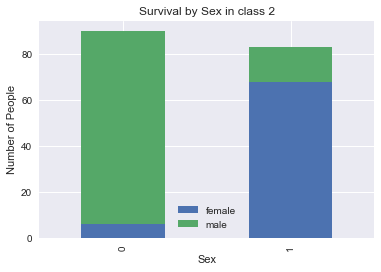

In [20]:
survived_sex_by_class_one = survived_sex_by_class(2)
survived_sex_by_class_one.plot(kind='bar', stacked=True)
plt.title('Survival by Sex in class 2')
plt.xlabel('Sex') 
plt.ylabel('Number of People')
plt.show()

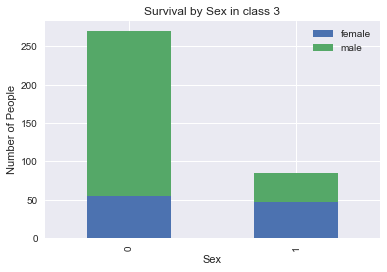

In [21]:
survived_sex_by_class_one = survived_sex_by_class(3)
survived_sex_by_class_one.plot(kind='bar', stacked=True)
plt.title('Survival by Sex in class 3')
plt.xlabel('Sex') 
plt.ylabel('Number of People')
plt.show()

From above visuallizations we can see that women's survival rate is much higher than men, which is about 0.755 while only 0.205 for men. Most of the women were survived. If see the survival rate by sex in each ticket class group, we can also see the same result that women's survival rate is higher than men's. But here we can notice that the survival distribution amongt these three different class is different, so except sex the ticket class is another obvious factor that influence people's survival rate.

### Attribute 2: Ticket Class ###
Let's move on to see the contribution of ticket class to passanger's survival rate.

In [40]:
#survival rates by different ticket class
Survived_by_class = titanic_data_clean.groupby('Pclass').mean()['Survived']
print Survived_by_class

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


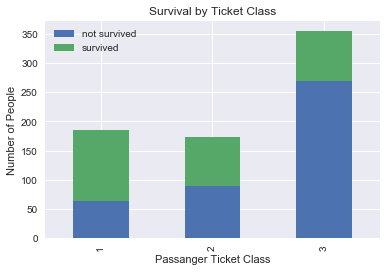

In [39]:
fig = plt.figure()

survived = titanic_data_clean.Pclass[titanic_data_clean.Survived == 1].value_counts()
not_survived = titanic_data_clean.Pclass[titanic_data_clean.Survived == 0].value_counts()
df=pd.DataFrame({'survived':survived, 'not survived':not_survived})

df.plot(kind='bar', stacked=True)
plt.title('Survival by Ticket Class' )
plt.xlabel('Passanger Ticket Class') 
plt.ylabel('Number of People') 
plt.show()

The above visuallizaiton shows clearly that the class 1 has a higher survival rate while the class 3 has the lowest survival rate. After calculating passangers with ticket class 1 has the highest survival rate as 0.656, with ticket class 2 has a survival rate 0.480, and with ticket class 3 has the lowet survival rate which is only 0.240.

### Attribute 3: Age ###
Now let's see if age also a obvious factor of people's chance of survival.

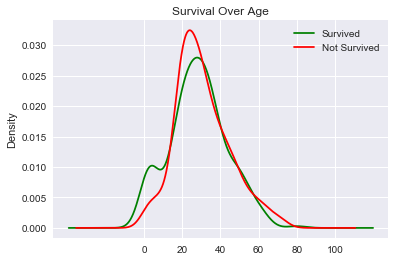

In [56]:
#plot 'Survived' and 'Not Survived' curve
titanic_data_clean.Age[titanic_data_clean.Survived == 1].plot(
    kind='kde',
    xticks=[0,20,40,60,80,100],
    title='Survival Over Age',
    legend=True,
    label='Survived',
    color='green')

titanic_data_clean.Age[titanic_data_clean.Survived == 0].plot(
    kind='kde',
    xticks=[0,20,40,60,80,100],
    title='Survival Over Age',
    legend=True,
    label='Not Survived',
    color='red')


Actually we can notice that for children there is a higher chance of survival (where the green curve is above the red curve). So it will make sense to cut the age into serveral intervals for further analysis.
+  0~10: 0 to 10 years old
+ 10~20: 10 to 20 years old
+ 20~30: 20 to 30 years old
+ 30~40: 30 to 40 years old
+ 40~50: 40 to 50 years old
+ 50~60: 50 to 60 years old
+ above 60: above 60 years old

In [80]:
def Age_category(years):
    if years > 0 and years < 10:
        return '0~10'
    elif years > 10 and years < 20:
        return '10~20'
    elif years > 20 and years < 30:
        return '20~30'
    elif years > 30 and years < 40:
        return '30~40'
    elif years > 40 and years < 50:
        return '40~50'
    elif years > 50 and years < 60:
        return '50~60'
    else:
        return 'above 60'
    
titanic_data_clean['Age_category'] = titanic_data_clean['Age'].apply(Age_category)
titanic_data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Age_category
0,0.0,3.0,male,22.0,1.0,0.0,20~30
1,1.0,1.0,female,38.0,1.0,0.0,30~40
2,1.0,3.0,female,26.0,0.0,0.0,20~30
3,1.0,1.0,female,35.0,1.0,0.0,30~40
4,0.0,3.0,male,35.0,0.0,0.0,30~40


In [81]:
survival_age_cagetory=titanic_data_clean.groupby('Age_category')['Survived'].mean()
survival_age_cagetory

Age_category
0~10        0.612903
10~20       0.410000
20~30       0.360976
30~40       0.443662
40~50       0.368421
50~60       0.394737
above 60    0.340659
Name: Survived, dtype: float64

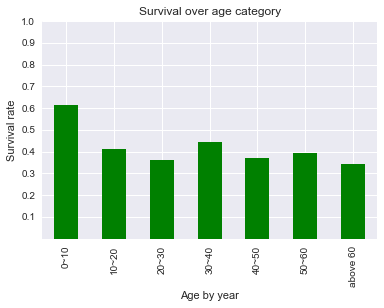

In [83]:
#plot bar graph
ax = survival_age_cagetory.plot( 
    title='Survival over age category', 
    kind='bar',
    yticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    color='g')

#set labels for axis
ax.set_xlabel("Age by year")
ax.set_ylabel("Survival rate")

The above visuallization verified that there is a higher chance of survival for children around 0 to 10 years old, and more than half of children were survived whoes survival rate is 0.61. It is higher than the overall survival rate, which is 0.41. The survival rate over age as below:
+ Passangers whose age was in 0~10 years old had a survival rate of 0.612903
+ Passangers whose age was in 10~20 years old had a survival rate of 0.410000
+ Passangers whose age was in 20~30 years old had a survival rate of 0.360976
+ Passangers whose age was in 30~40 years old had a survival rate of 0.443662
+ Passangers whose age was in 30~40 years old had a survival rate of 0.368421
+ Passangers whose age was in 30~40 years old had a survival rate of 0.394737
+ Passangers whose age was above 60 years old had a survival rate of 0.340659

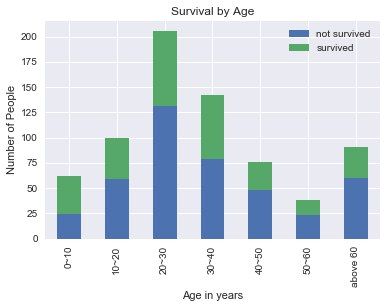

In [84]:
fig = plt.figure()

survived = titanic_data_clean.Age_category[titanic_data_clean.Survived == 1].value_counts()
not_survived = titanic_data_clean.Age_category[titanic_data_clean.Survived == 0].value_counts()
df=pd.DataFrame({'survived':survived, 'not survived':not_survived})

df.plot(kind='bar', stacked=True)
plt.title('Survival by Age' )
plt.xlabel('Age in years') 
plt.ylabel('Number of People') 
plt.show()

## Conclusion ##
### What factors made people more likely to survive? ###

The factors that were most likely to influence one's chance of survival in the sinking of the Titanic were:

#### Sex ####
women's survival rate is much higher than men, which is about 0.755 while only 0.205 for men. Most of the women were survived. Even when investigating from three ticket class respectively, we can also draw the conclusion that women had higher chance of survival compared with men in the sinking of the Titanic.

#### Ticket Class####
A better travel ticket class is positively correlated with the survival rate. Passangers with a ticket of class 1 has the highest survival rate while the one with ticket of class 3 has the lowest survival rate.

#### Age ####
In gerenal children among 0 to 10 years old have had a higher survival rate. 

### Limitations: ###
Not all passagners' information were included in this data set, and even 177 records were removed from the data set in data wrangling phase due to no "Age" record. And the attribute "Cabin" can not be analyzed since there were only 204 records in the data set. Maybe the chance of survival also be influenced by "Cabin" which is near to the emergency exit.

### Reference ###
+ https://stackoverflow.com/questions/18084554/why-do-i-get-a-syntaxerror-for-a-unicode-escape-in-my-file-path
+ https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
+ https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
+ http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
+ https://en.wikipedia.org/wiki/RMS_Titanic
